In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
css = open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [6]:
# build decade column for each Df
cast['decade'] = cast.year //10 * 10

In [5]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [7]:
cm = release_dates[release_dates.title.str.contains('Christmas', case=False)]
cm.head()

,title,year,country,date
1017,12 Dog Days of Christmas,2014,USA,2014-11-28
1018,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5320,A Belle for Christmas,2014,USA,2014-11-04
5321,A Belle for Christmas,2014,France,2014-12-26
5496,A Bulldog for Christmas,2013,UK,2014-11-03


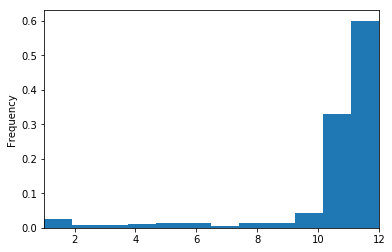

In [18]:
cm.date.dt.month.plot.hist(bins=12, density=True, xlim=(1,12))

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [34]:
hb = release_dates[release_dates.title.str.startswith('The Hobbit')]
hb = hb[hb.country == 'USA']
hb

,title,year,country,date
329784,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14
329849,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17
329918,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13


In [29]:
hb.date.dt.month

329784    12
329849    12
329918    12
Name: date, dtype: int64

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [37]:
rm = release_dates[release_dates.title.str.contains('Romance', case=False)]
rm = rm[rm.country == 'USA']
rm.head()

,title,year,country,date
772,100% OFF: A Recession-Era Romance,2012,USA,2012-07-04
5538,A California Romance,1922,USA,1922-12-24
5752,A Circus Romance,1916,USA,1916-01-24
5876,A Crooked Romance,1917,USA,1917-09-30
5887,A Cumberland Romance,1920,USA,1920-08-06


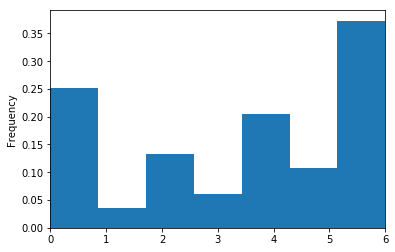

In [41]:
rm.date.dt.dayofweek.plot.hist(bins=7 , density=True, xlim=(0,6))

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [42]:
act = release_dates[release_dates.title.str.contains('Action', case=False)]
act = act[act.country == 'USA']
act.head()

,title,year,country,date
5260,A Beautiful Distraction,2016,USA,2016-09-15
5755,A Civil Action,1998,USA,1999-01-08
7598,A Man of Action,1923,USA,1923-06-03
11731,Ace of Action,1926,USA,1926-11-28
11965,Action,1921,USA,1921-09-12


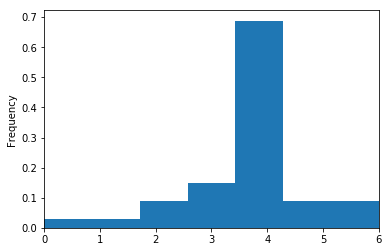

In [43]:
act.date.dt.dayofweek.plot.hist(bins=7 , density=True, xlim=(0,6))

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [7]:
jd = cast[cast.name == 'Judi Dench']
jd = jd[jd.decade == 1990]
jd.head()

,title,year,name,type,character,n,decade
2483927,GoldenEye,1995,Judi Dench,actress,M,6.0,1990
2483928,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,1990
2483934,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,1990
2483939,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,1990
2483951,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,1990


In [9]:
jd = jd.merge(release_dates)

In [11]:
jd.date.dt.date.head()

0    1995-11-16
1    1995-11-17
2    1995-11-24
3    1995-11-24
4    1995-11-24
Name: date, dtype: object

### In which months do films with Judi Dench tend to be released in the USA?

In [12]:
jd = cast[cast.name == 'Judi Dench']
jd = jd.merge(release_dates)
jd = jd[jd.country == 'USA']
jd.head()

,title,year,name,type,character,n,decade,country,date
0,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3.0,1980,USA,1987-02-13
7,A Handful of Dust,1988,Judi Dench,actress,Mrs. Beaver,13.0,1980,USA,1988-06-24
33,A Study in Terror,1965,Judi Dench,actress,Sally,8.0,1960,USA,1966-08-10
67,Casino Royale,2006,Judi Dench,actress,M,4.0,2000,USA,2006-11-17
108,Chocolat,2000,Judi Dench,actress,Armande Voizin,18.0,2000,USA,2001-01-19


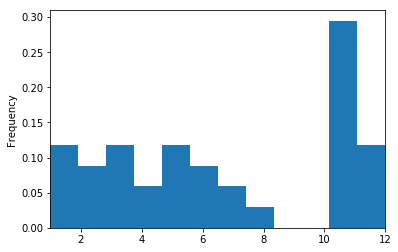

In [17]:
jd.date.dt.month.plot.hist(bins=12,density=True, xlim=(1,12))

### In which months do films with Tom Cruise tend to be released in the USA?

In [18]:
tc = cast[cast.name == 'Tom Cruise']
tc = tc.merge(release_dates)
tc = tc[tc.country == 'USA']
tc.head()

,title,year,name,type,character,n,decade,country,date
2,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1.0,1990,USA,1992-12-11
20,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1.0,1980,USA,1983-10-21
28,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81.0,2000,USA,2002-07-26
69,Austin Powers in Goldmember,2002,Tom Cruise,actor,Famous Austin ('Austinpussy'),81.0,2000,USA,2002-07-26
107,Born on the Fourth of July,1989,Tom Cruise,actor,Ron Kovic,1.0,1980,USA,1990-01-05


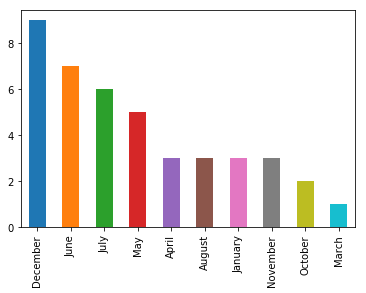

In [20]:
tc.date.dt.month_name().value_counts().plot.bar()

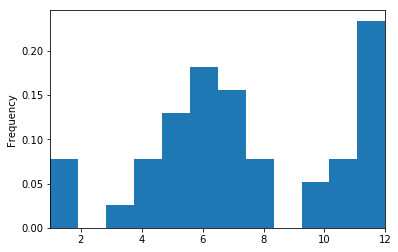

In [31]:
tc.date.dt.month.plot.hist(bins=12,density=True, xlim=(1,12))

In [29]:
months = ['January', 'February', 'March', 'April', 
          'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December' ]